# 1.0 Introduction

This feature is a wrapper from some imbalanced-learn methods to solve some problems involving imbalanced data sets. The samplers folow the scikit-learn API and use the estimator addig a sampler funcionality throught the sampler method.
In generaly the balacing issue correspond to the difference of the number of samples in the diferent classes and this feature brings some soluctions to test in any models that presents this issue.


## 1.1 Import modules

In [1]:
from gumly import imbalanced
from imblearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd

## 1.2 Auxiliary Functions


In [2]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

## 1.3 Data

In [3]:
def create_dataset_over(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )

def counting_classes(y):
    return Counter(y) #sorted([x[1] for x in Counter(y).items()])

X, y = create_dataset_over(n_samples=1000, weights = (0.05,0.25,0.7))
class_map = counting_classes(y)

In [4]:
class_map

Counter({1: 253, 2: 694, 0: 53})

# 2.0 Oversampling

This technique helps to solve issues and generate nem samples in the classes where are under-represented.
The oversampling techniques implemented in our library was:
     
     - Random
     - SMOTE
     - Adasyn
 
Below a SMOTE example.

## 2.1 Oversampling SMOTE

In [5]:
X_resample, y_resample = imbalanced.oversampler(X, y, 'smote', random_state=0,n_neighbors=4)
class_map = counting_classes(y_resample)

In [6]:
class_map

Counter({1: 694, 2: 694, 0: 694})

## 2.2 Ploting exemple with Logistic Regression to understand

In [7]:
clf = LogisticRegression()

### 2.2.1 Exemple Over-Sampling Balanced

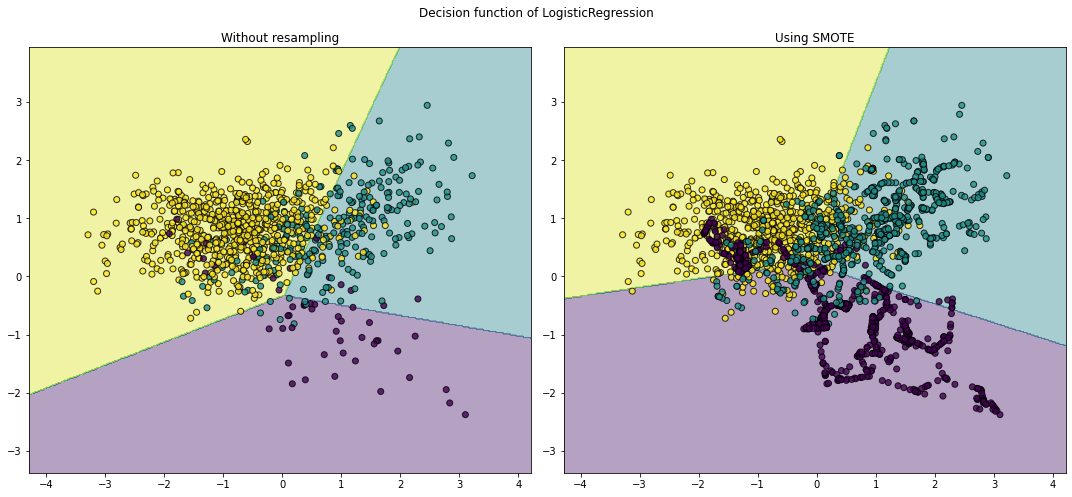

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
clf.fit(X, y)

plot_decision_function(X, y, clf, axs[0], title="Without resampling")

model = clf.fit(X_resample, y_resample)

plot_decision_function(X_resample,y_resample, model, axs[1], title="Using SMOTE")

fig.suptitle(f"Decision function of LogisticRegression")
fig.tight_layout()

# 3.0 Undersampling 

This technique will reduce the numbers of samples in the targeted classes. The undersampling techniques implemented in our library was:

 - Nearmiss
 - Random

Below a Nearmiss example.

## 3.2 Undersampling Nearmiss

In [9]:
X_resample, y_resample = imbalanced.undersampler(X, y, 'nearmiss', random_state=0)
class_map = counting_classes(y_resample)

In [10]:
class_map

Counter({0: 53, 1: 53, 2: 53})

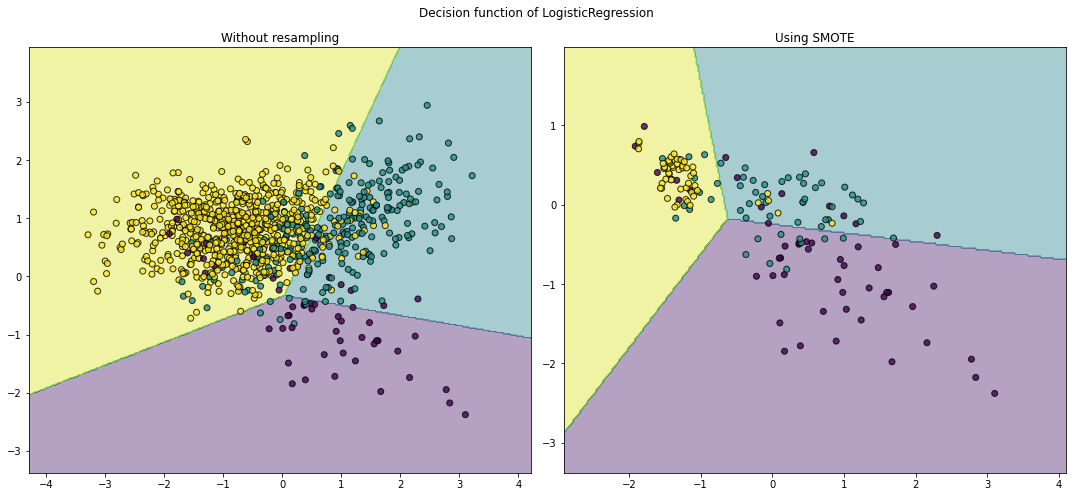

In [11]:
# Plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
clf.fit(X, y)

plot_decision_function(X, y, clf, axs[0], title="Without resampling")

model = clf.fit(X_resample, y_resample)

plot_decision_function(X_resample,y_resample, model, axs[1], title="Using SMOTE")

fig.suptitle(f"Decision function of LogisticRegression")
fig.tight_layout()

# 4.0 Combine

This technique consists in combine methods od over-sampling and under-sampling to get better result. The combine techniques implemented in our library was:

 - SMOTEENN
 - SMOTETOMEK

Below a SMOTETOMEK example.

## 4.1 SMOTETOMEK

In [12]:
X_resample, y_resample = imbalanced.combine(X, y, 'smotetomek', random_state=0)
class_map = counting_classes(y_resample)
class_map

Counter({1: 646, 2: 631, 0: 663})

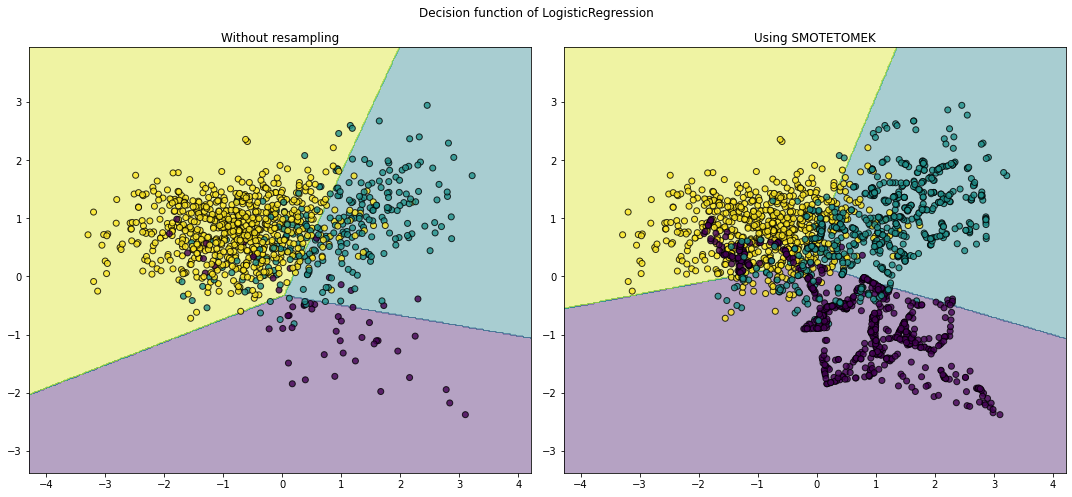

In [13]:
# Plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
clf.fit(X, y)

plot_decision_function(X, y, clf, axs[0], title="Without resampling")

model = clf.fit(X_resample, y_resample)

plot_decision_function(X_resample,y_resample, model, axs[1], title="Using SMOTETOMEK")

fig.suptitle(f"Decision function of LogisticRegression")
fig.tight_layout()

# 5.0 Conclusion and library advantages

This implamantation makes the code more easy to use only calling the sampler method as wish to test in the model.

# References

[Imbalanced-learn](https://imbalanced-learn.org/stable/index.html)


[Make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)


[Colections Counter](https://docs.python.org/3/library/collections.html#counter-objects)


[Matplotlib](https://matplotlib.org/)


[Numpy](https://numpy.org/)


[LogistcRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Pandas](https://pandas.pydata.org/)



